In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path1 = "/content/drive/MyDrive/datasets/train.csv"
path2 = "/content/drive/MyDrive/datasets/test.csv"
train_df = pd.read_csv(path1)
test_df = pd.read_csv(path2)

In [ ]:
path3 = "/content/drive/MyDrive/datasets/test.csv"

In [ ]:
index_df = pd.read_csv(path3)

In [ ]:
index_df.head()

,index,mort,category,geography,year,gender,deaths,population,crude_rate,standardised_age_rate,...,premature_deaths_percent,"premature_deaths_asr_per_100,000",potential_years_of_life_lost,leverman_rate,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric
0,14438,LGA36950,LGA,Torres (S),2016,Unknown,19.04,"3,888",437.2,,...,64.7,,119,31.2,7,63.6,,Single,0.270206,2.267081
1,9222,LGA45120,LGA,Northern Areas (DC),2015,M,23.52,"2,349",886.8,545.3,...,38.1,,85,39.9,4,,,Married,0.235901,1.784841
2,9469,LGA51310,LGA,Cambridge (T),2017,M,68.32,"13,992",437.6,320.2,...,24.2,,173,13.2,6,42.8,,Single,0.151069,5.140845
3,11904,LGA43790,LGA,Loxton Waikerie (DC),2017,F,62.72,"5,808",964.9,495.4,...,19.6,,163,31.5,5,45.5,,Married,0.333018,2.246154
4,2655,SA311003,SA3,Moree - Narrabri,2013,M,119.84,"13,251",807.5,833,...,49.5,356.5,810,64.6,34,64.2,235.1,Married,0.377614,1.112805


In [ ]:
train_df.isna().sum()

index                               0
mort                                0
category                            0
geography                           0
year                                0
gender                              0
deaths                              0
population                          0
crude_rate                          0
standardised_age_rate               0
rate_ratio                          0
premature_deaths                    0
premature_deaths_percent            0
premature_deaths_asr_per_100,000    0
potential_years_of_life_lost        0
leverman_rate                       0
potentially_avoidable_deaths        0
pad_percent                         0
pad_asr_per_100,000                 0
marital_status                      0
stramer_rate                        0
inverse_pyll_metric                 0
median_age                          0
dtype: int64

In [ ]:
print(train_df[train_df['index']==12109])

   index      mort category          geography  year gender  deaths  \
3  12109  LGA49399      LGA  Unincorporated SA  2017      F    4.48   

  population crude_rate standardised_age_rate  ...  \
3      1,362      327.1                        ...   

  premature_deaths_asr_per_100,000 potential_years_of_life_lost leverman_rate  \
3                                                            17          13.6   

  potentially_avoidable_deaths pad_percent pad_asr_per_100,000 marital_status  \
3                            1                                        Unknown   

  stramer_rate inverse_pyll_metric median_age  
3     0.263523                 5.0      74.57  

[1 rows x 23 columns]


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             11835 non-null  int64  
 1   mort                              11835 non-null  object 
 2   category                          11835 non-null  object 
 3   geography                         11835 non-null  object 
 4   year                              11835 non-null  int64  
 5   gender                            11835 non-null  object 
 6   deaths                            11835 non-null  float64
 7   population                        11835 non-null  object 
 8   crude_rate                        11835 non-null  object 
 9   standardised_age_rate             11835 non-null  object 
 10  rate_ratio                        11835 non-null  object 
 11  premature_deaths                  11835 non-null  object 
 12  prem

In [ ]:
cols=[]
for col in train_df.columns:
    cols.append(col)
print(cols)

['index', 'mort', 'category', 'geography', 'year', 'gender', 'deaths', 'population', 'crude_rate', 'standardised_age_rate', 'rate_ratio', 'premature_deaths', 'premature_deaths_percent', 'premature_deaths_asr_per_100,000', 'potential_years_of_life_lost', 'leverman_rate', 'potentially_avoidable_deaths', 'pad_percent', 'pad_asr_per_100,000', 'marital_status', 'stramer_rate', 'inverse_pyll_metric', 'median_age']


In [ ]:

categorical_cols = cols[7:18]
print(categorical_cols)

['population', 'crude_rate', 'standardised_age_rate', 'rate_ratio', 'premature_deaths', 'premature_deaths_percent', 'premature_deaths_asr_per_100,000', 'potential_years_of_life_lost', 'leverman_rate', 'potentially_avoidable_deaths', 'pad_percent']


In [ ]:
train_df.isnull().sum()

index                               0
mort                                0
category                            0
geography                           0
year                                0
gender                              0
deaths                              0
population                          0
crude_rate                          0
standardised_age_rate               0
rate_ratio                          0
premature_deaths                    0
premature_deaths_percent            0
premature_deaths_asr_per_100,000    0
potential_years_of_life_lost        0
leverman_rate                       0
potentially_avoidable_deaths        0
pad_percent                         0
pad_asr_per_100,000                 0
marital_status                      0
stramer_rate                        0
inverse_pyll_metric                 0
median_age                          0
dtype: int64

In [ ]:
train_df['category'].unique()



array(['LGA', 'SA3', 'GCCSA', 'PHN', 'SA4', 'Remoteness area',
       'State and territory', 'Socioeconomic group'], dtype=object)

In [ ]:
train_df['year'].unique()

array([2016, 2013, 2014, 2017, 2015])

In [ ]:

train_df['gender'].unique()

array(['Unknown', 'F', 'M'], dtype=object)

In [ ]:
train_df['marital_status'].unique()

array(['Married', 'Divorced', 'Unknown', 'Single'], dtype=object)

In [ ]:
for i in categorical_cols:
  train_df[i]= train_df[i].str.replace(',', '')

for i in categorical_cols:
  test_df[i]= test_df[i].str.replace(',', '')


In [ ]:
train_df['population'] = pd.to_numeric(train_df['population'], errors='coerce')
test_df['population'] = pd.to_numeric(test_df['population'], errors='coerce')

In [ ]:
train_df['population'] = train_df['population'].astype(float)
test_df['population'] = test_df['population'].astype(float)


In [ ]:
from pandas.core.arrays import categorical
for i in categorical_cols:
  train_df[i]=pd.to_numeric(train_df[i],errors='coerce')
  train_df[i]=train_df[i].astype(float)

for i in categorical_cols:
  test_df[i]=pd.to_numeric(test_df[i],errors='coerce')
  test_df[i]=test_df[i].astype(float)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             11835 non-null  int64  
 1   mort                              11835 non-null  object 
 2   category                          11835 non-null  object 
 3   geography                         11835 non-null  object 
 4   year                              11835 non-null  int64  
 5   gender                            11835 non-null  object 
 6   deaths                            11835 non-null  float64
 7   population                        11755 non-null  float64
 8   crude_rate                        11659 non-null  float64
 9   standardised_age_rate             9561 non-null   float64
 10  rate_ratio                        9561 non-null   float64
 11  premature_deaths                  11674 non-null  float64
 12  prem

In [ ]:
train_df['pad_asr_per_100,000'] = pd.to_numeric(train_df['pad_asr_per_100,000'], errors='coerce')
test_df['pad_asr_per_100,000'] = pd.to_numeric(test_df['pad_asr_per_100,000'], errors='coerce')

In [ ]:
train_df['pad_asr_per_100,000'] = train_df['pad_asr_per_100,000'].astype(float)
test_df['pad_asr_per_100,000'] = test_df['pad_asr_per_100,000'].astype(float)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             11835 non-null  int64  
 1   mort                              11835 non-null  object 
 2   category                          11835 non-null  object 
 3   geography                         11835 non-null  object 
 4   year                              11835 non-null  int64  
 5   gender                            11835 non-null  object 
 6   deaths                            11835 non-null  float64
 7   population                        11755 non-null  float64
 8   crude_rate                        11659 non-null  float64
 9   standardised_age_rate             9561 non-null   float64
 10  rate_ratio                        9561 non-null   float64
 11  premature_deaths                  11674 non-null  float64
 12  prem

In [ ]:
train_df.drop(['index'],axis=1,inplace=True)
test_df.drop(['index'],axis=1,inplace=True)

In [ ]:
train_df.drop(['mort'],axis=1,inplace = True)
test_df.drop(['mort'],axis=1,inplace= True)

In [ ]:
train_df.head()

,category,geography,year,gender,deaths,population,crude_rate,standardised_age_rate,rate_ratio,premature_deaths,...,"premature_deaths_asr_per_100,000",potential_years_of_life_lost,leverman_rate,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric,median_age
0,LGA,Norwood Payneham St Peters (C),2016,Unknown,329.28,37099.0,792.5,428.3,0.81,68.0,...,159.5,1151.0,34.5,28.0,41.2,67.2,Married,0.261667,2.056338,86.00
1,SA3,Playford,2013,Unknown,708.96,91348.0,693.0,702.5,1.31,262.0,...,320.7,4871.0,56.4,146.0,55.7,181.6,Married,0.467149,1.271777,79.30
2,SA3,Woden Valley,2014,F,187.04,18259.0,914.6,457.4,1.03,27.0,...,123.1,272.0,16.6,11.0,40.7,NaN,Divorced,0.311074,4.147727,87.80
3,LGA,Unincorporated SA,2017,F,4.48,1362.0,327.1,NaN,NaN,2.0,...,NaN,17.0,13.6,1.0,NaN,NaN,Unknown,0.263523,5.000000,74.57
4,LGA,Mid-Coast (A),2014,F,585.76,47105.0,1110.9,469.6,1.06,128.0,...,167.3,1604.0,39.4,69.0,53.9,98.0,Single,0.368682,1.806931,84.40


In [ ]:
train_df.isnull().sum()

category                               0
geography                              0
year                                   0
gender                                 0
deaths                                 0
population                            80
crude_rate                           176
standardised_age_rate               2274
rate_ratio                          2274
premature_deaths                     161
premature_deaths_percent            1536
premature_deaths_asr_per_100,000    3294
potential_years_of_life_lost         161
leverman_rate                        176
potentially_avoidable_deaths         161
pad_percent                         2256
pad_asr_per_100,000                 4601
marital_status                         0
stramer_rate                           0
inverse_pyll_metric                    0
median_age                             0
dtype: int64

In [ ]:

train_df['population'].fillna(value = train_df['population'].mean(), inplace = True)
train_df['crude_rate'].fillna(value = train_df['crude_rate'].mean(), inplace = True)
#train_df['standardised_age_rate '].fillna(value = train_df['standardised_age_rate'].mean(), inplace = True)
train_df['rate_ratio'].fillna(value = train_df['rate_ratio'].mean(), inplace = True)
train_df['premature_deaths'].fillna(value = train_df['premature_deaths'].mean(), inplace = True)
train_df['premature_deaths_percent'].fillna(value = train_df['premature_deaths_percent'].mean(), inplace = True)

train_df['premature_deaths_asr_per_100,000'].fillna(value = train_df['premature_deaths_asr_per_100,000'].mean(), inplace = True)

train_df['potential_years_of_life_lost'].fillna(value = train_df['potential_years_of_life_lost'].mean(), inplace = True)

train_df['leverman_rate'].fillna(value = train_df['leverman_rate'].mean(), inplace = True)

train_df['potentially_avoidable_deaths'].fillna(value = train_df['potentially_avoidable_deaths'].mean(), inplace = True)
train_df['pad_percent'].fillna(value = train_df['pad_percent'].mean(), inplace = True)

train_df['pad_asr_per_100,000'].fillna(value = train_df['pad_asr_per_100,000'].mean(), inplace = True)

In [ ]:
test_df['population'].fillna(value = test_df['population'].mean(), inplace = True)
test_df['crude_rate'].fillna(value = test_df['crude_rate'].mean(), inplace = True)
#train_df['standardised_age_rate '].fillna(value = train_df['standardised_age_rate'].mean(), inplace = True)
test_df['rate_ratio'].fillna(value = test_df['rate_ratio'].mean(), inplace = True)
test_df['premature_deaths'].fillna(value = test_df['premature_deaths'].mean(), inplace = True)
test_df['premature_deaths_percent'].fillna(value = test_df['premature_deaths_percent'].mean(), inplace = True)

test_df['premature_deaths_asr_per_100,000'].fillna(value = test_df['premature_deaths_asr_per_100,000'].mean(), inplace = True)

test_df['potential_years_of_life_lost'].fillna(value = test_df['potential_years_of_life_lost'].mean(), inplace = True)

test_df['leverman_rate'].fillna(value = test_df['leverman_rate'].mean(), inplace = True)

test_df['potentially_avoidable_deaths'].fillna(value = test_df['potentially_avoidable_deaths'].mean(), inplace = True)
test_df['pad_percent'].fillna(value = test_df['pad_percent'].mean(), inplace = True)

test_df['pad_asr_per_100,000'].fillna(value = test_df['pad_asr_per_100,000'].mean(), inplace = True)

In [ ]:
train_df['standardised_age_rate'].fillna(value = train_df['standardised_age_rate'].mean(), inplace = True)
test_df['standardised_age_rate'].fillna(value = test_df['standardised_age_rate'].mean(), inplace = True)

In [ ]:
import seaborn as sns
Q1 = np.percentile(train_df['potential_years_of_life_lost'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(train_df['potential_years_of_life_lost'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

2678.5


In [ ]:
upper = train_df['potential_years_of_life_lost'] >= (Q3+1.5*IQR)
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = train_df['potential_years_of_life_lost'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0        False
1        False
2        False
3        False
4        False
         ...  
11830    False
11831    False
11832    False
11833    False
11834    False
Name: potential_years_of_life_lost, Length: 11835, dtype: bool
(array([    6,    21,    23, ..., 11814, 11821, 11825]),)
Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
11830    False
11831    False
11832    False
11833    False
11834    False
Name: potential_years_of_life_lost, Length: 11835, dtype: bool
(array([], dtype=int64),)


In [ ]:
print(np.where(train_df['deaths']>150000))

(array([ 2254,  2429,  2592,  2622,  3140,  3216,  3258,  3483,  3618,
        3933,  3987,  4203,  5200,  6035,  7084,  7185,  7726,  7827,
        8513,  8964,  9341,  9473,  9596, 10407, 11097, 11109, 11171,
       11650]),)


In [ ]:
print(len(pd.unique(train_df['geography'])))

1021


In [ ]:
train_df.drop('geography',inplace =True,axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          11835 non-null  object 
 1   year                              11835 non-null  int64  
 2   gender                            11835 non-null  object 
 3   deaths                            11835 non-null  float64
 4   population                        11835 non-null  float64
 5   crude_rate                        11835 non-null  float64
 6   standardised_age_rate             11835 non-null  float64
 7   rate_ratio                        11835 non-null  float64
 8   premature_deaths                  11835 non-null  float64
 9   premature_deaths_percent          11835 non-null  float64
 10  premature_deaths_asr_per_100,000  11835 non-null  float64
 11  potential_years_of_life_lost      11835 non-null  float64
 12  leve

In [ ]:
train_encoded_df = train_df.copy(deep=True)
test_encoded_df = test_df.copy(deep=True)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'category'.
train_encoded_df['category']= label_encoder.fit_transform(train_encoded_df['category'])
  
train_encoded_df['category'].unique()

test_encoded_df['category']= label_encoder.fit_transform(test_encoded_df['category'])
  
test_encoded_df['category'].unique()

array([1, 4, 3, 5, 0, 7, 6, 2])

[3033, 2959, 2935, 2908]


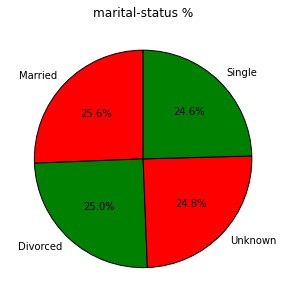

In [ ]:
colors = ['#FF0000','#008000']
l = list(train_df['marital_status'].value_counts())
print(l) 

circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100,l[2] / sum(l) * 100,l[3] / sum(l) * 100]


fig = plt.subplots(nrows = 1,ncols = 1,figsize = (20,5))

plt.subplot(1,2,1)

plt.pie(circle,labels = ['Married','Divorced', 'Unknown','Single'],autopct = '%1.1f%%',startangle = 90,explode = (0,0,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.title('marital-status %');

[3976, 3971, 3888]


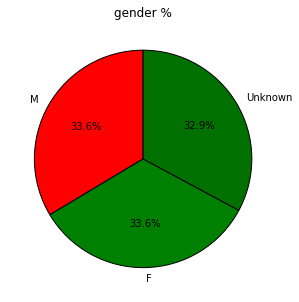

In [ ]:
colors = ['#FF0000','#008000','#007000']
l = list(train_df['gender'].value_counts())
print(l) 

circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100,l[2] / sum(l) * 100]


fig = plt.subplots(nrows = 1,ncols = 1,figsize = (20,5))

plt.subplot(1,2,1)

plt.pie(circle,labels = ['M','F','Unknown'],autopct = '%1.1f%%',startangle = 90,explode = (0,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.title('gender %');


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='Unknown',strategy='most_frequent')
train_encoded_df.marital_status=imputer.fit_transform(train_encoded_df['marital_status'].values.reshape(-1,1))[:,0]
test_encoded_df.marital_status=imputer.fit_transform(test_encoded_df['marital_status'].values.reshape(-1,1))[:,0]

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='Unknown',strategy='most_frequent')
train_encoded_df.gender=imputer.fit_transform(train_encoded_df['gender'].values.reshape(-1,1))[:,0]
test_encoded_df.gender=imputer.fit_transform(test_encoded_df['gender'].values.reshape(-1,1))[:,0]

In [ ]:
train_encoded_df.head()

,category,year,gender,deaths,population,crude_rate,standardised_age_rate,rate_ratio,premature_deaths,premature_deaths_percent,"premature_deaths_asr_per_100,000",potential_years_of_life_lost,leverman_rate,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric,median_age
0,1,2016,F,329.28,37099.0,792.5,428.300000,0.810000,68.0,23.10000,159.500000,1151.0,34.5,28.0,41.200000,67.200000,Married,0.261667,2.056338,86.00
1,4,2013,F,708.96,91348.0,693.0,702.500000,1.310000,262.0,41.40000,320.700000,4871.0,56.4,146.0,55.700000,181.600000,Married,0.467149,1.271777,79.30
2,4,2014,F,187.04,18259.0,914.6,457.400000,1.030000,27.0,16.20000,123.100000,272.0,16.6,11.0,40.700000,116.674772,Divorced,0.311074,4.147727,87.80
3,1,2017,F,4.48,1362.0,327.1,547.742809,1.048957,2.0,36.97926,220.543203,17.0,13.6,1.0,50.379549,116.674772,Married,0.263523,5.000000,74.57
4,1,2014,F,585.76,47105.0,1110.9,469.600000,1.060000,128.0,24.50000,167.300000,1604.0,39.4,69.0,53.900000,98.000000,Single,0.368682,1.806931,84.40


In [ ]:
test_encoded_df.drop('geography',axis=1,inplace=True)

In [ ]:


# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'category'.
train_encoded_df['marital_status']= label_encoder.fit_transform(train_encoded_df['marital_status'])
  
test_encoded_df['marital_status']= label_encoder.fit_transform(test_encoded_df['marital_status'])

In [ ]:
train_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          11835 non-null  int64  
 1   year                              11835 non-null  int64  
 2   gender                            11835 non-null  object 
 3   deaths                            11835 non-null  float64
 4   population                        11835 non-null  float64
 5   crude_rate                        11835 non-null  float64
 6   standardised_age_rate             11835 non-null  float64
 7   rate_ratio                        11835 non-null  float64
 8   premature_deaths                  11835 non-null  float64
 9   premature_deaths_percent          11835 non-null  float64
 10  premature_deaths_asr_per_100,000  11835 non-null  float64
 11  potential_years_of_life_lost      11835 non-null  float64
 12  leve

In [ ]:
from sklearn.preprocessing import OneHotEncoder
One_enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(One_enc.fit_transform(train_encoded_df[['gender']]).toarray())
train_encoded_df_final= train_encoded_df.join(enc_df)

In [ ]:
train_encoded_df_final.head()

,category,year,gender,deaths,population,crude_rate,standardised_age_rate,rate_ratio,premature_deaths,premature_deaths_percent,...,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric,median_age,0,1,2
0,1,2016,Unknown,329.28,37099.0,792.5,428.300000,0.810000,68.0,23.10000,...,28.0,41.200000,67.200000,1,0.261667,2.056338,86.00,0.0,0.0,1.0
1,4,2013,Unknown,708.96,91348.0,693.0,702.500000,1.310000,262.0,41.40000,...,146.0,55.700000,181.600000,1,0.467149,1.271777,79.30,0.0,0.0,1.0
2,4,2014,F,187.04,18259.0,914.6,457.400000,1.030000,27.0,16.20000,...,11.0,40.700000,116.674772,0,0.311074,4.147727,87.80,1.0,0.0,0.0
3,1,2017,F,4.48,1362.0,327.1,547.742809,1.048957,2.0,36.97926,...,1.0,50.379549,116.674772,3,0.263523,5.000000,74.57,1.0,0.0,0.0
4,1,2014,F,585.76,47105.0,1110.9,469.600000,1.060000,128.0,24.50000,...,69.0,53.900000,98.000000,2,0.368682,1.806931,84.40,1.0,0.0,0.0


In [ ]:
enc_df_2 = pd.DataFrame(One_enc.fit_transform(test_encoded_df[['gender']]).toarray())
test_encoded_df_final= test_encoded_df.join(enc_df_2)

In [ ]:
train_encoded_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          11835 non-null  int64  
 1   year                              11835 non-null  int64  
 2   gender                            11835 non-null  object 
 3   deaths                            11835 non-null  float64
 4   population                        11835 non-null  float64
 5   crude_rate                        11835 non-null  float64
 6   standardised_age_rate             11835 non-null  float64
 7   rate_ratio                        11835 non-null  float64
 8   premature_deaths                  11835 non-null  float64
 9   premature_deaths_percent          11835 non-null  float64
 10  premature_deaths_asr_per_100,000  11835 non-null  float64
 11  potential_years_of_life_lost      11835 non-null  float64
 12  leve

In [ ]:
test_encoded_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          3945 non-null   int64  
 1   year                              3945 non-null   int64  
 2   gender                            3945 non-null   object 
 3   deaths                            3945 non-null   float64
 4   population                        3945 non-null   float64
 5   crude_rate                        3945 non-null   float64
 6   standardised_age_rate             3945 non-null   float64
 7   rate_ratio                        3945 non-null   float64
 8   premature_deaths                  3945 non-null   float64
 9   premature_deaths_percent          3945 non-null   float64
 10  premature_deaths_asr_per_100,000  3945 non-null   float64
 11  potential_years_of_life_lost      3945 non-null   float64
 12  leverm

In [ ]:
train_encoded_df_final.drop('gender',axis=1,inplace=True)
test_encoded_df_final.drop('gender',axis=1,inplace=True)

In [ ]:
train_encoded_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          11835 non-null  int64  
 1   year                              11835 non-null  int64  
 2   deaths                            11835 non-null  float64
 3   population                        11835 non-null  float64
 4   crude_rate                        11835 non-null  float64
 5   standardised_age_rate             11835 non-null  float64
 6   rate_ratio                        11835 non-null  float64
 7   premature_deaths                  11835 non-null  float64
 8   premature_deaths_percent          11835 non-null  float64
 9   premature_deaths_asr_per_100,000  11835 non-null  float64
 10  potential_years_of_life_lost      11835 non-null  float64
 11  leverman_rate                     11835 non-null  float64
 12  pote

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
ss = StandardScaler()
train_encoded_df_final['population']=ss.fit_transform(train_encoded_df[['population']])
train_encoded_df_final['crude_rate']=ss.fit_transform(train_encoded_df[['crude_rate']])
train_encoded_df_final['standardised_age_rate']=ss.fit_transform(train_encoded_df[['standardised_age_rate']])
train_encoded_df_final['rate_ratio']=ss.fit_transform(train_encoded_df[['rate_ratio']])
train_encoded_df_final['premature_deaths']=ss.fit_transform(train_encoded_df[['premature_deaths']])
train_encoded_df_final['premature_deaths_percent']=ss.fit_transform(train_encoded_df[['premature_deaths_percent']])
train_encoded_df_final['premature_deaths_asr_per_100,000']=ss.fit_transform(train_encoded_df[['premature_deaths_asr_per_100,000']])
train_encoded_df_final['potential_years_of_life_lost']=ss.fit_transform(train_encoded_df[['potential_years_of_life_lost']])
train_encoded_df_final['leverman_rate']=ss.fit_transform(train_encoded_df[['leverman_rate']])


In [ ]:
train_encoded_df_final['potentially_avoidable_deaths']=ss.fit_transform(train_encoded_df[['potentially_avoidable_deaths']])
train_encoded_df_final['pad_percent']=ss.fit_transform(train_encoded_df[['pad_percent']])
train_encoded_df_final['pad_asr_per_100,000']=ss.fit_transform(train_encoded_df[['pad_asr_per_100,000']])
train_encoded_df_final['potentially_avoidable_deaths']=ss.fit_transform(train_encoded_df[['potentially_avoidable_deaths']])
train_encoded_df_final['stramer_rate']=ss.fit_transform(train_encoded_df[['stramer_rate']])
train_encoded_df_final['inverse_pyll_metric']=ss.fit_transform(train_encoded_df[['inverse_pyll_metric']])


In [ ]:
train_encoded_df_final['deaths']=ss.fit_transform(train_encoded_df[['deaths']])

In [ ]:
test_encoded_df_final['population']=ss.fit_transform(test_encoded_df_final[['population']])
test_encoded_df_final['crude_rate']=ss.fit_transform(test_encoded_df_final[['crude_rate']])
test_encoded_df_final['standardised_age_rate']=ss.fit_transform(test_encoded_df_final[['standardised_age_rate']])
test_encoded_df_final['rate_ratio']=ss.fit_transform(test_encoded_df_final[['rate_ratio']])
test_encoded_df_final['premature_deaths']=ss.fit_transform(test_encoded_df_final[['premature_deaths']])
test_encoded_df_final['premature_deaths_percent']=ss.fit_transform(test_encoded_df_final[['premature_deaths_percent']])
test_encoded_df_final['premature_deaths_asr_per_100,000']=ss.fit_transform(test_encoded_df_final[['premature_deaths_asr_per_100,000']])
test_encoded_df_final['potential_years_of_life_lost']=ss.fit_transform(test_encoded_df_final[['potential_years_of_life_lost']])
test_encoded_df_final['leverman_rate']=ss.fit_transform(test_encoded_df_final[['leverman_rate']])
test_encoded_df_final['potentially_avoidable_deaths']=ss.fit_transform(test_encoded_df_final[['potentially_avoidable_deaths']])
test_encoded_df_final['pad_percent']=ss.fit_transform(test_encoded_df_final[['pad_percent']])
test_encoded_df_final['pad_asr_per_100,000']=ss.fit_transform(test_encoded_df_final[['pad_asr_per_100,000']])
test_encoded_df_final['potentially_avoidable_deaths']=ss.fit_transform(test_encoded_df_final[['potentially_avoidable_deaths']])
test_encoded_df_final['stramer_rate']=ss.fit_transform(test_encoded_df_final[['stramer_rate']])
test_encoded_df_final['inverse_pyll_metric']=ss.fit_transform(test_encoded_df_final[['inverse_pyll_metric']])



In [ ]:
test_encoded_df_final['deaths']=ss.fit_transform(test_encoded_df[['deaths']])

In [ ]:
test_encoded_df_final.head()

,category,year,deaths,population,crude_rate,standardised_age_rate,rate_ratio,premature_deaths,premature_deaths_percent,"premature_deaths_asr_per_100,000",potential_years_of_life_lost,leverman_rate,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric,0,1
0,1,2016,-0.162251,-0.162108,-1.133382,0.000000,0.000000,-0.162217,2.189223,-4.214231e-16,-0.162732,-0.625117,-0.161079,1.894219,-3.812317e-16,2,-0.781588,0.034414,0.0,1.0
1,1,2015,-0.161908,-0.162966,0.640331,-0.036306,-0.780238,-0.162961,0.071924,-4.214231e-16,-0.163249,-0.295218,-0.162560,0.000000,-3.812317e-16,1,-1.196733,-0.090936,0.0,1.0
2,1,2017,-0.158475,-0.156472,-1.131804,-1.935903,-2.760046,-0.161226,-1.034484,-4.214231e-16,-0.161910,-1.307668,-0.161573,-1.081058,-3.812317e-16,2,-2.223328,0.781405,0.0,1.0
3,1,2017,-0.158904,-0.161037,0.948442,-0.457407,0.924597,-0.162217,-1.400633,-4.214231e-16,-0.162063,-0.613741,-0.162066,-0.694845,-3.812317e-16,1,-0.021482,0.028975,1.0,0.0
4,4,2013,-0.154527,-0.156886,0.327485,2.391566,1.419549,-0.151809,0.979338,1.995358e+00,-0.152217,0.641394,-0.147756,1.980044,3.158752e+00,1,0.518202,-0.265622,0.0,1.0


In [ ]:
train_encoded_df_final['year']= label_encoder.fit_transform(train_encoded_df_final['year'])
  
test_encoded_df_final['year']= label_encoder.fit_transform(test_encoded_df_final['year'])

In [ ]:
test_encoded_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          3945 non-null   int64  
 1   year                              3945 non-null   int64  
 2   deaths                            3945 non-null   float64
 3   population                        3945 non-null   float64
 4   crude_rate                        3945 non-null   float64
 5   standardised_age_rate             3945 non-null   float64
 6   rate_ratio                        3945 non-null   float64
 7   premature_deaths                  3945 non-null   float64
 8   premature_deaths_percent          3945 non-null   float64
 9   premature_deaths_asr_per_100,000  3945 non-null   float64
 10  potential_years_of_life_lost      3945 non-null   float64
 11  leverman_rate                     3945 non-null   float64
 12  potent

In [ ]:
train_encoded_df_final.head()

,category,year,deaths,population,crude_rate,standardised_age_rate,rate_ratio,premature_deaths,premature_deaths_percent,"premature_deaths_asr_per_100,000",...,leverman_rate,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric,median_age,0,1
0,1,3,-0.124327,-0.130104,0.287173,-1.006371e+00,-1.342855,-0.133985,-1.101477e+00,-0.905223,...,-0.473688,-0.137013,-1.338895e+00,-1.301667e+00,1,-0.893053,-0.029830,86.00,1.0,0.0
1,4,0,-0.090776,-0.095592,-0.101195,1.303914e+00,1.466968,-0.077526,3.508359e-01,1.485247,...,0.325312,-0.068568,7.760215e-01,1.708164e+00,1,1.697396,-0.218025,79.30,1.0,0.0
2,4,1,-0.136897,-0.142090,0.763754,-7.611879e-01,-0.106533,-0.145918,-1.649070e+00,-1.445007,...,-1.126753,-0.146873,-1.411824e+00,-3.738835e-16,0,-0.270199,0.471838,87.80,1.0,0.0
3,1,4,-0.153029,-0.152839,-1.529377,-9.578742e-16,0.000000,-0.153193,-5.638964e-16,0.000000,...,-1.236205,-0.152674,-1.036372e-15,-3.738835e-16,1,-0.869653,0.676275,74.57,1.0,0.0
4,1,1,-0.101663,-0.123738,1.529952,-6.583962e-01,0.062057,-0.116524,-9.903711e-01,-0.789555,...,-0.294917,-0.113231,5.134801e-01,-4.913279e-01,2,0.456051,-0.089656,84.40,1.0,0.0


In [ ]:
train_encoded_df_final.head()

,category,year,deaths,population,crude_rate,standardised_age_rate,rate_ratio,premature_deaths,premature_deaths_percent,"premature_deaths_asr_per_100,000",...,leverman_rate,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric,median_age,0,1
0,1,3,-0.124327,-0.130104,0.287173,-1.006371e+00,-1.342855,-0.133985,-1.101477e+00,-0.905223,...,-0.473688,-0.137013,-1.338895e+00,-1.301667e+00,1,-0.893053,-0.029830,86.00,1.0,0.0
1,4,0,-0.090776,-0.095592,-0.101195,1.303914e+00,1.466968,-0.077526,3.508359e-01,1.485247,...,0.325312,-0.068568,7.760215e-01,1.708164e+00,1,1.697396,-0.218025,79.30,1.0,0.0
2,4,1,-0.136897,-0.142090,0.763754,-7.611879e-01,-0.106533,-0.145918,-1.649070e+00,-1.445007,...,-1.126753,-0.146873,-1.411824e+00,-3.738835e-16,0,-0.270199,0.471838,87.80,1.0,0.0
3,1,4,-0.153029,-0.152839,-1.529377,-9.578742e-16,0.000000,-0.153193,-5.638964e-16,0.000000,...,-1.236205,-0.152674,-1.036372e-15,-3.738835e-16,1,-0.869653,0.676275,74.57,1.0,0.0
4,1,1,-0.101663,-0.123738,1.529952,-6.583962e-01,0.062057,-0.116524,-9.903711e-01,-0.789555,...,-0.294917,-0.113231,5.134801e-01,-4.913279e-01,2,0.456051,-0.089656,84.40,1.0,0.0


In [ ]:
cols_at_end = ['median_age']
train_encoded_df_final= train_encoded_df_final[[c for c in train_encoded_df_final if c not in cols_at_end] 
        + [c for c in cols_at_end if c in train_encoded_df_final]]

In [ ]:
train_encoded_df_final.head()

,category,year,deaths,population,crude_rate,standardised_age_rate,rate_ratio,premature_deaths,premature_deaths_percent,"premature_deaths_asr_per_100,000",...,leverman_rate,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric,0,1,median_age
0,1,3,-0.124327,-0.130104,0.287173,-1.006371e+00,-1.342855,-0.133985,-1.101477e+00,-0.905223,...,-0.473688,-0.137013,-1.338895e+00,-1.301667e+00,1,-0.893053,-0.029830,1.0,0.0,86.00
1,4,0,-0.090776,-0.095592,-0.101195,1.303914e+00,1.466968,-0.077526,3.508359e-01,1.485247,...,0.325312,-0.068568,7.760215e-01,1.708164e+00,1,1.697396,-0.218025,1.0,0.0,79.30
2,4,1,-0.136897,-0.142090,0.763754,-7.611879e-01,-0.106533,-0.145918,-1.649070e+00,-1.445007,...,-1.126753,-0.146873,-1.411824e+00,-3.738835e-16,0,-0.270199,0.471838,1.0,0.0,87.80
3,1,4,-0.153029,-0.152839,-1.529377,-9.578742e-16,0.000000,-0.153193,-5.638964e-16,0.000000,...,-1.236205,-0.152674,-1.036372e-15,-3.738835e-16,1,-0.869653,0.676275,1.0,0.0,74.57
4,1,1,-0.101663,-0.123738,1.529952,-6.583962e-01,0.062057,-0.116524,-9.903711e-01,-0.789555,...,-0.294917,-0.113231,5.134801e-01,-4.913279e-01,2,0.456051,-0.089656,1.0,0.0,84.40


In [ ]:
test_encoded_df_final.head()

,category,year,deaths,population,crude_rate,standardised_age_rate,rate_ratio,premature_deaths,premature_deaths_percent,"premature_deaths_asr_per_100,000",potential_years_of_life_lost,leverman_rate,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric,0,1
0,1,3,-0.162251,-0.162108,-1.133382,0.000000,0.000000,-0.162217,2.189223,-4.214231e-16,-0.162732,-0.625117,-0.161079,1.894219,-3.812317e-16,2,-0.781588,0.034414,0.0,1.0
1,1,2,-0.161908,-0.162966,0.640331,-0.036306,-0.780238,-0.162961,0.071924,-4.214231e-16,-0.163249,-0.295218,-0.162560,0.000000,-3.812317e-16,1,-1.196733,-0.090936,0.0,1.0
2,1,4,-0.158475,-0.156472,-1.131804,-1.935903,-2.760046,-0.161226,-1.034484,-4.214231e-16,-0.161910,-1.307668,-0.161573,-1.081058,-3.812317e-16,2,-2.223328,0.781405,0.0,1.0
3,1,4,-0.158904,-0.161037,0.948442,-0.457407,0.924597,-0.162217,-1.400633,-4.214231e-16,-0.162063,-0.613741,-0.162066,-0.694845,-3.812317e-16,1,-0.021482,0.028975,1.0,0.0
4,4,0,-0.154527,-0.156886,0.327485,2.391566,1.419549,-0.151809,0.979338,1.995358e+00,-0.152217,0.641394,-0.147756,1.980044,3.158752e+00,1,0.518202,-0.265622,0.0,1.0


In [ ]:
y=train_encoded_df_final.median_age

In [ ]:
train_encoded_df_final.drop('median_age',axis=1,inplace=True)

In [ ]:
train_encoded_df_final.head(
    
)

,category,year,deaths,population,crude_rate,standardised_age_rate,rate_ratio,premature_deaths,premature_deaths_percent,"premature_deaths_asr_per_100,000",potential_years_of_life_lost,leverman_rate,potentially_avoidable_deaths,pad_percent,"pad_asr_per_100,000",marital_status,stramer_rate,inverse_pyll_metric,0,1
0,1,3,-0.124327,-0.130104,0.287173,-1.006371e+00,-1.342855,-0.133985,-1.101477e+00,-0.905223,-0.132688,-0.473688,-0.137013,-1.338895e+00,-1.301667e+00,1,-0.893053,-0.029830,1.0,0.0
1,4,0,-0.090776,-0.095592,-0.101195,1.303914e+00,1.466968,-0.077526,3.508359e-01,1.485247,-0.066126,0.325312,-0.068568,7.760215e-01,1.708164e+00,1,1.697396,-0.218025,1.0,0.0
2,4,1,-0.136897,-0.142090,0.763754,-7.611879e-01,-0.106533,-0.145918,-1.649070e+00,-1.445007,-0.148415,-1.126753,-0.146873,-1.411824e+00,-3.738835e-16,0,-0.270199,0.471838,1.0,0.0
3,1,4,-0.153029,-0.152839,-1.529377,-9.578742e-16,0.000000,-0.153193,-5.638964e-16,0.000000,-0.152978,-1.236205,-0.152674,-1.036372e-15,-3.738835e-16,1,-0.869653,0.676275,1.0,0.0
4,1,1,-0.101663,-0.123738,1.529952,-6.583962e-01,0.062057,-0.116524,-9.903711e-01,-0.789555,-0.124582,-0.294917,-0.113231,5.134801e-01,-4.913279e-01,2,0.456051,-0.089656,1.0,0.0


In [ ]:
train_encoded_df_final['category'].unique()

array([1, 4, 0, 2, 5, 3, 7, 6])

In [ ]:
train_encoded_df_final['category']=mms.fit_transform(train_encoded_df[['category']])
train_encoded_df_final['year']=mms.fit_transform(train_encoded_df[['year']])



In [ ]:
train_encoded_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          11835 non-null  int64  
 1   year                              11835 non-null  int64  
 2   deaths                            11835 non-null  float64
 3   population                        11835 non-null  float64
 4   crude_rate                        11835 non-null  float64
 5   standardised_age_rate             11835 non-null  float64
 6   rate_ratio                        11835 non-null  float64
 7   premature_deaths                  11835 non-null  float64
 8   premature_deaths_percent          11835 non-null  float64
 9   premature_deaths_asr_per_100,000  11835 non-null  float64
 10  potential_years_of_life_lost      11835 non-null  float64
 11  leverman_rate                     11835 non-null  float64
 12  pote

In [ ]:
train_encoded_df_final['category'] = train_encoded_df_final['category'].astype(float)
train_encoded_df_final['year'] = train_encoded_df_final['year'].astype(float)
train_encoded_df_final['marital_status'] = train_encoded_df_final['marital_status'].astype(float)


In [ ]:
train_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          11835 non-null  int64  
 1   year                              11835 non-null  int64  
 2   gender                            11835 non-null  object 
 3   deaths                            11835 non-null  float64
 4   population                        11835 non-null  float64
 5   crude_rate                        11835 non-null  float64
 6   standardised_age_rate             11835 non-null  float64
 7   rate_ratio                        11835 non-null  float64
 8   premature_deaths                  11835 non-null  float64
 9   premature_deaths_percent          11835 non-null  float64
 10  premature_deaths_asr_per_100,000  11835 non-null  float64
 11  potential_years_of_life_lost      11835 non-null  float64
 12  leve

In [ ]:
f1 = train_encoded_df_final.iloc[:,:20].values
t1 = train_encoded_df.iloc[:,19].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(f1,t1,test_size=0.25,random_state=1)

In [ ]:
print(x_train1[0:21])

[[ 1.00000000e+00  4.00000000e+00 -1.53127956e-01 -1.53201711e-01
  -1.35919719e+00 -9.57874150e-16  0.00000000e+00 -1.53193318e-01
  -5.63896410e-16  0.00000000e+00 -1.52727637e-01 -1.85464395e-01
  -1.52673519e-01 -1.03637162e-15 -3.73883512e-16  1.00000000e+00
  -8.76564482e-01 -1.19616764e-01  1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00 -1.51148516e-01 -1.52434478e-01
   1.65836778e+00  2.75647931e+00  2.25371846e+00 -1.50865097e-01
   7.07962089e-01  0.00000000e+00 -1.51278310e-01  4.60303290e-01
  -1.50353373e-01 -7.11713151e-01 -3.73883512e-16  1.00000000e+00
   5.63070411e-01 -2.36498439e-01  0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -6.98924862e-02 -2.19927737e-02
  -1.21438842e+00 -9.62879730e-03 -1.62729338e-01 -4.90054580e-02
   4.54005722e-01 -3.86200352e-01 -4.50122333e-02 -6.23272994e-01
  -3.20259252e-02  1.11149108e+00 -9.14202525e-02  1.00000000e+00
   5.69517798e-01  3.45767016e-02  1.00000000e+00  0.00000000e+00]
 [ 1.00

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [16],
    'max_depth': [6],
    'random_state' : [66,67,68]
}
regr = RandomForestRegressor(random_state=0)
clf = GridSearchCV(regr, parameters)
clf.fit(x_train1, y_train1)


GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [6], 'n_estimators': [16],
                         'random_state': [66, 67, 68]})

In [ ]:
clf.best_estimator_

RandomForestRegressor(max_depth=6, n_estimators=16, random_state=67)

In [ ]:
model_f=RandomForestRegressor(n_estimators=16,
                             max_depth=6,
                             random_state =67
                            )
model_f.fit(train_encoded_df_final, y)
prediction=model_f.predict(test_encoded_df_final)
output_f=pd.DataFrame({'index':index_df['index'],'median_age':prediction})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from google.colab import files
output_f.to_csv('final_submissionctd.csv',index=False)
files.download('final_submissionctd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model2 = XGBRegressor()
model2.fit(train_encoded_df_final, y)
prediction=model2.predict(test_encoded_df_final)
output2=pd.DataFrame({'index':index_df['index'],'median_age':prediction})

[10:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
output2.to_csv('final_sub2.csv')
files.download('final_sub2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model3=RandomForestRegressor(n_estimators=20,
                             max_depth=12,
                             criterion='mse',
                            )
model3.fit(train_encoded_df_final, y)
prediction=model3.predict(test_encoded_df_final)
output3=pd.DataFrame({'index':index_df['index'],'median_age':prediction})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
output3.to_csv('final_submit.csv',index=False)
files.download('final_submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# create model
def baseline_model():
  model = Sequential()
  model.add(Dense(20, input_shape=(20,), kernel_initializer='normal', activation='relu'))
  model.add(Dense(10, kernel_initializer='normal'))
  model.add(Dense(5, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [ ]:
estimator = KerasRegressor(build_fn = baseline_model)


In [ ]:
estimator.fit(train_encoded_df_final,y)
prediction_final = estimator.predict(test_encoded_df_final)

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


124/124 [==============================] - 0s 1ms/step


In [ ]:
output4=pd.DataFrame({'index':index_df['index'],'median_age':prediction_final})

In [ ]:
output4.to_csv('final_submit2.csv',index=False)
files.download('final_submit2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>